# A) Implementación de algoritmo Merge Sort en Python

In [6]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time 
import datetime

def merge(left,right):

    temporal_sort = []


    while left and right:  # While the len of left and right > 0
        
        # Sort and combine 
        temporal_sort.append((left if left[0] <= right[0] else right).pop(0))

    
    # Add the last values to have a complete sort array 
    if 0 <= len(left):
        temporal_sort += (left)
    if 0 <= len(right):
        temporal_sort += (right)

    return temporal_sort 


def merge_sort(unsorted_array):

    len_list = len(unsorted_array)

    if len_list == 1 or len_list == 0:
        return unsorted_array
    
    # Calculate the central point of the array

    mid = (len_list)// 2

    # Left Sort
    left_sort = merge_sort(unsorted_array[:mid])
    # Right Sort
    right_sort = merge_sort(unsorted_array[mid:])

    # Return the sorted array

    return merge(left_sort,right_sort)

### Test merge sort

In [3]:
# Generate a random array with 10 items
unsorted_array = list(np.random.randint(0,100,10))


print(f"Unsorted Array : {unsorted_array}")
sorted_array = merge_sort(unsorted_array)


print(f"Sorted Array {sorted_array}")

Unsorted Array : [14, 32, 70, 39, 80, 94, 74, 9, 70, 11]
Sorted Array [9, 11, 14, 32, 39, 70, 70, 74, 80, 94]


# B) Considerar diferentes valores de n, partiendo de 1 e ir incrementándolo. Para cada valor de n hacer 100 experimentos y reportar la mediana de los tiempos de ejecución de estos (para dicho n).  Se deben tomar valores de n hasta que el tiempo de ejecución total dure m ́as de 5 minutos Específicamente, cada experimento consiste en los siguientes pasos

## a ) Generar aleatoriamente un arreglo de enteros de valores de 1 a 5000
## b ) Calcular el tiempo de ejecución tomado por insertion-sort para ordenar ese arreglo en espec ́ıfico.

In [4]:
# Insertion Sort Algorithm 

def insertion_sort(unsorted_array):
    
    for i in range(1,len(unsorted_array)):   

        key = unsorted_array[i]
        j = i - 1

        while 0 <= j and unsorted_array[j] > key:
            unsorted_array[j+1] = unsorted_array[j]
            j -= 1        
        unsorted_array[j+1] = key
    return unsorted_array
    

In [22]:

average_time = []
for n in range(2,4):

    time_execution = 0
    size_test = 1
    times = []

    while time_execution < 0.2:

        size_test += 1
    
        unsorted_array = np.random.randint(1,5000,size_test)
        start_time = time.time()

        sorted_array = insertion_sort(unsorted_array)

        # Calculate the time for the Insertion Sort algorithm
        time_execution = time.time() - start_time
        print(size_test,time_execution)
    average_time.append(np.average(times))

# Generate a DataFrame with all the time_spend data 



2 5.817413330078125e-05
3 2.6226043701171875e-06
4 2.86102294921875e-06
5 2.6226043701171875e-06
6 2.86102294921875e-06
7 4.291534423828125e-06
8 3.814697265625e-06
9 6.67572021484375e-06
10 7.152557373046875e-06
11 8.344650268554688e-06
12 7.62939453125e-06
13 9.298324584960938e-06
14 1.0013580322265625e-05
15 1.2874603271484375e-05
16 1.0728836059570312e-05
17 1.71661376953125e-05
18 1.7404556274414062e-05
19 2.002716064453125e-05
20 1.8596649169921875e-05
21 2.3365020751953125e-05
22 2.2172927856445312e-05
23 2.384185791015625e-05
24 2.8848648071289062e-05
25 3.62396240234375e-05
26 2.8133392333984375e-05
27 3.8623809814453125e-05
28 3.647804260253906e-05
29 3.361701965332031e-05
30 4.482269287109375e-05
31 4.744529724121094e-05
32 4.1484832763671875e-05
33 5.8650970458984375e-05
34 5.698204040527344e-05
35 5.984306335449219e-05
36 5.626678466796875e-05
37 6.961822509765625e-05
38 6.771087646484375e-05
39 6.794929504394531e-05
40 6.794929504394531e-05
41 8.0108642578125e-05
42 7.605

/home/user/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/user/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


277 0.005779266357421875
278 0.00628352165222168
279 0.004586219787597656
280 0.0036644935607910156
281 0.0033419132232666016
282 0.0034151077270507812
283 0.0037407875061035156
284 0.0034928321838378906
285 0.0038449764251708984
286 0.003586292266845703
287 0.0035889148712158203
288 0.003597259521484375
289 0.0036878585815429688
290 0.003826141357421875
291 0.003426074981689453
292 0.0036334991455078125
293 0.003644227981567383
294 0.0034072399139404297
295 0.003646373748779297
296 0.003748178482055664
297 0.003942728042602539
298 0.003860950469970703
299 0.003705263137817383
300 0.003988027572631836
301 0.003899097442626953
302 0.003847360610961914
303 0.0037987232208251953
304 0.003966093063354492
305 0.004099369049072266
306 0.004178285598754883
307 0.004145383834838867
308 0.004252910614013672
309 0.0039136409759521484
310 0.004025697708129883
311 0.004153728485107422
312 0.004369974136352539
313 0.004082918167114258
314 0.003831148147583008
315 0.004271507263183594
316 0.00450801

In [252]:
# Graph 
#time_info = pd.DataFrame({"Size":list(range(1,101)) ,"Time Execution":times})
print(len(average_time))
#plt.scatter(time_info['Size'],time_info['Time Execution'],marker = "s",label = "first")


2


# Implementación codigo Counting Sort

In [ ]:
def counting_sort(arr):
    # Encuentra el valor máximo en el arreglo
    max_value = max(arr)
    
    # Crear un arreglo de conteo con el tamaño adecuado
    count = [0] * (max_value + 1)
    
    # Contar la frecuencia de cada elemento
    for num in arr:
        count[num] += 1
    
    # Reconstruir el arreglo ordenado
    sorted_arr = []
    for i in range(len(count)):
        while count[i] > 0:
            sorted_arr.append(i)
            count[i] -= 1
    
    return sorted_arr

## Test de algoritmo counting sort

In [8]:
# Generate a random array with 10 items
unsorted_array = list(np.random.randint(0,100,10))


print(f"Unsorted Array : {unsorted_array}")
sorted_array = counting_sort(unsorted_array)


print(f"Sorted Array {sorted_array}")

Unsorted Array : [4, 81, 74, 39, 37, 58, 94, 1, 58, 56]
Sorted Array [1, 4, 37, 39, 56, 58, 58, 74, 81, 94]


In [149]:
time_inicial = time.time()  # Tiempo inicio

time_final = time.time() - time_inicial
n = 5000

# DataFrame para guardar la media de tiempo de ejecucion para cada n experimento
times_sort = []
while time_final < 300:#300
    
    # 100 experimentos para cada valor de n 

    temp_time = []
    
    
    for i in range(100):
        
        tiempo_experimentol_inicial = time.time()

        unsorted_array = np.random.randint(1,5000,n)
        sorted_array = counting_sort(unsorted_array)
        
        # Agregar tiempo de ejecucion para cada subexperimento de n
        temp_time.append(time.time() - tiempo_experimentol_inicial)

    # calcular promedio de cada subexperimento
    promedio = sum(temp_time)/len(temp_time)
    times_sort.append(promedio)
    
    time_final = time.time() - time_inicial
    n += 1

# Creacion dataframe

 

In [168]:
df_counting_sort = pd.DataFrame({"Size":list(range(5000,n)) ,"Time Execution":times_sort})

for i in range(50):

    # Encuentra el índice del elemento mayor
    indice_mayor = df_counting_sort["Time Execution"].idxmax()

    # Calcula la media entre el elemento anterior y posterior
    media = (df_counting_sort.at[indice_mayor-1, "Time Execution"] + df_counting_sort.at[indice_mayor+1,"Time Execution"]) / 2

    # Reemplaza el elemento mayor por el valor de la media
    df_counting_sort.at[indice_mayor, "Time Execution"] = media


0.001627206802368164


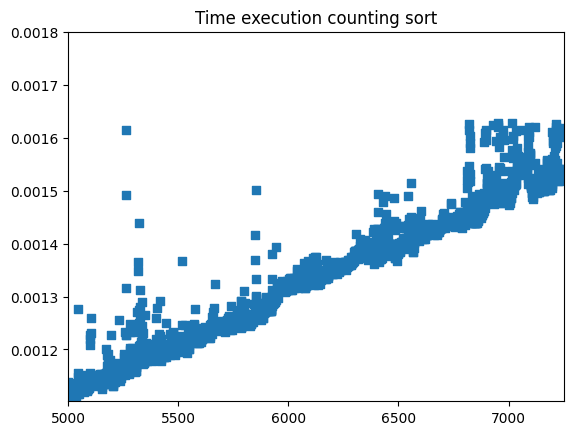

In [234]:
print(df_counting_sort['Time Execution'].max())
plt.scatter(df_counting_sort['Size'],df_counting_sort['Time Execution'],marker = "s",label = "first")
plt.title("Time execution counting sort")
plt.ylim(df_counting_sort['Time Execution'].min(),0.0018)
plt.xlim(5000, n + 10)

plt.show()

Encuentre las constantes c3 y n0 que demuestren que el tiempo de
ejecuci ́on experimental de counting-sort es T (n) = O(n + k). So-
bre la gr ́afica de los resultados experimentales tambi ́en graficar la
funci ́on h(n) = c3(n + k). Debe especificar cu ́al es c3 y n0. Las gr ́afi-
cas deben ser claras. Se debe poder distinguir claramente las l ́ıneas
y se debe especificar cu ́al es cada una.

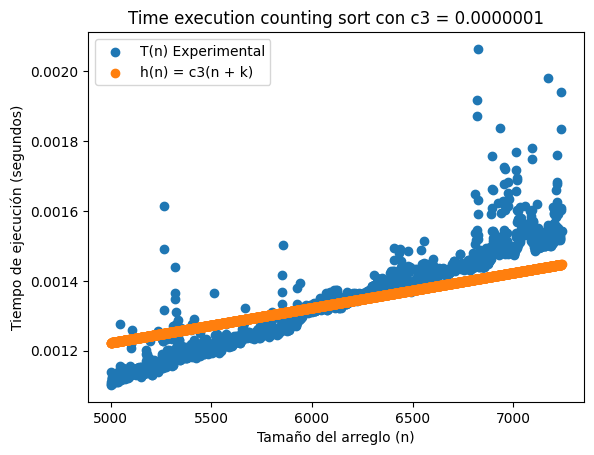

In [243]:
tamaños = np.array(list(range(5000,n)))
#df_2 = pd.DataFrame({'Size':tamaños,'Time Execution':})
c3 = 0.0000001 # Valor arbitrario para c3
k = tamaños[-1] # Tomamos el máximo tamaño de arreglo como el rango 'k'
h_n = c3 * (tamaños + k)

plt.scatter(tamaños, times_sort, label='T(n) Experimental')
plt.scatter(tamaños, h_n, label='h(n) = c3(n + k)')
plt.xlabel('Tamaño del arreglo (n)')
plt.title("Time execution counting sort con c3 = 0.0000001")
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend()
plt.show()